In diesem Tutorial werden die basic Funktionen von uproot gezeigt

In [1]:
import uproot



.root file öffnen mit uproot.open


In [2]:
file = uproot.open('tutorial.root')

In [3]:
file

<ReadOnlyDirectory '/' at 0x7f30b04a4ad0>



Mit .keys und .classnames kann man sich die tieferen Strukturen ausgeben


In [4]:
file.keys

<bound method ReadOnlyDirectory.keys of <ReadOnlyDirectory '/' at 0x7f30b04a4ad0>>

In [5]:
file.classnames()

{'all;1': 'TTree', 'alpha;1': 'TTree'}



TTree alpha im TFile öffnen


In [6]:
tree = file['alpha']

In [7]:
tree

<TTree 'alpha' (1 branches) at 0x7f2fc6fea990>



Branches im TTree öffnen (in diesem Fall haben wir nur einen Branch)


In [8]:
branches = tree.arrays()

In [9]:
branches

<Array [{ekin: 0.966}, ..., {ekin: 0.0042}] type='98266 * {ekin: float64}'>

In [10]:
branches['ekin']

<Array [0.966, 1.27, 1.35, ..., 1.09, 1.47, 0.0042] type='98266 * float64'>



Einzelne Branches können auch direkt ausgewählt und als DataFrame oder Numpyarray abgespeichert werden


In [11]:
ekin = tree.arrays(['ekin'],library="pd")

In [13]:
ekin.tail(10)

ekin
98256  1.258656
98257  1.392499
98258  1.004449
98259  1.402533
98260  0.030163
98261  1.052866
98262  1.095592
98263  1.092062
98264  1.465789
98265  0.004202

#########################################



Durch Matplotlib lässt sich auch leicht plotten


In [14]:
import matplotlib.pyplot as plt

(array([ 6705.,  5551.,  6652.,  9457., 13692., 15358., 16296., 17388.,
         5998.,  1169.]),
 array([9.96168513e-04, 1.78558284e-01, 3.56120400e-01, 5.33682515e-01,
        7.11244631e-01, 8.88806746e-01, 1.06636886e+00, 1.24393098e+00,
        1.42149309e+00, 1.59905521e+00, 1.77661732e+00]),
 <BarContainer object of 10 artists>)

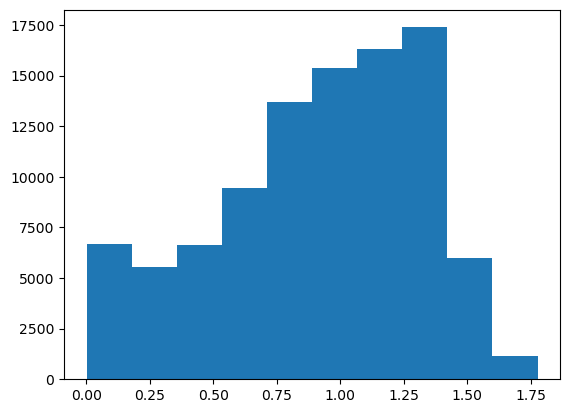

In [15]:
plt.hist(branches['ekin'])

Text(0.5, 1.0, 'keine Ahnung')

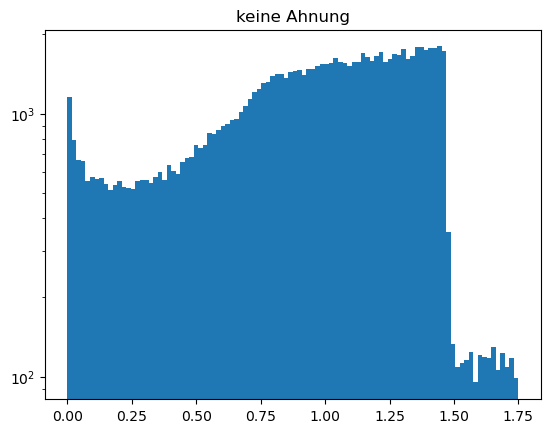

In [17]:
plt.hist(branches['ekin'], bins=100, range=(0,1.75))
plt.yscale('log')
plt.title("keine Ahnung")

#####################################################


Eines der besten Features von Python ist die Verwendung von Masken! Perfekt um Cuts anzuwenden ohne dabei viel Code verwenden zu müssen.


In [18]:
len(branches['ekin'])

98266

In [19]:
cut_ekin1_mask = branches['ekin'] > 1.0

In [20]:
cut_ekin1_mask

<Array [False, True, True, False, ..., True, True, False] type='98266 * bool'>

In [21]:
ekin_aftercut = branches['ekin'][cut_ekin1_mask]

In [22]:
len(ekin_aftercut)

46844

In [23]:
ekin_aftercut

<Array [1.27, 1.35, 1.11, 1.25, ..., 1.1, 1.09, 1.47] type='46844 * float64'>

In [24]:
ekin_aftercut = branches['ekin'][~cut_ekin1_mask]


############################################



Man kann auch direkt nur einen Tree statt dem TFile öffnen


In [25]:
events = uproot.open('tutorial.root:alpha')

In [26]:
events

<TTree 'alpha' (1 branches) at 0x7f2fb4b78350>


#############################################



WICHTIG: Den gesamten Tree bei allen Rechnungen in die Memory zu laden kann teilweise sehr lange dauern und ist häufig auch nicht möglich.
--> Man kann über Tree loopen !


In [27]:
for batch in events.iterate(step_size=10000):
    print(repr(batch))

<Array [{ekin: 0.966}, {...}, ..., {ekin: 1.45}] type='10000 * {ekin: float64}'>
<Array [{ekin: 0.0362}, ..., {ekin: 1.16}] type='10000 * {ekin: float64}'>
<Array [{ekin: 0.91}, {...}, ..., {ekin: 0.202}] type='10000 * {ekin: float64}'>
<Array [{ekin: 1.4}, {...}, ..., {ekin: 0.769}] type='10000 * {ekin: float64}'>
<Array [{ekin: 1.11}, {...}, ..., {ekin: 0.968}] type='10000 * {ekin: float64}'>
<Array [{ekin: 0.579}, {...}, ..., {ekin: 1.3}] type='10000 * {ekin: float64}'>
<Array [{ekin: 1.41}, {...}, ..., {ekin: 1.34}] type='10000 * {ekin: float64}'>
<Array [{ekin: 0.695}, ..., {ekin: 0.911}] type='10000 * {ekin: float64}'>
<Array [{ekin: 0.538}, ..., {ekin: 0.449}] type='10000 * {ekin: float64}'>
<Array [{ekin: 1.1}, {...}, ..., {ekin: 0.0042}] type='8266 * {ekin: float64}'>


In [31]:
ekin_above1 = []
for batch in events.iterate(step_size=500):
    #print(repr(batch))
    ekintemp = batch['ekin'][batch['ekin'] > 1.0]
    ekin_above1.extend(ekintemp)

In [32]:
len(ekin_above1)

197